# NOx yealy emissions comparison across data catalogues

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [3]:
seconds_in_year = 31536000
area_earth = 5.1006447295*pow(10,14)
NO2_molar_mass = 46.006 #g/mol
NO_molar_mass =  30.006 #g/mol

In [4]:
def make_emission_plottable(file_name, column_name):
    emissions = pd.read_csv(file_name, sep = ',')
    emissions.columns = ['Date', column_name]
    return emissions.set_index(pd.to_datetime(emissions['Date'])).drop(columns = ['Date'])

### SSPs, CMIP6

In [5]:
ssp126_road_file = '/work/bd1063/b309253/emissions/ssps-anthro-nox-ssp126-y.csv'
ssp460_road_file = '/work/bd1063/b309253/emissions/ssps-anthro-nox-ssp460-y.csv'
ssp585_road_file = '/work/bd1063/b309253/emissions/ssps-anthro-nox-ssp585-y.csv'
sspx_road_file = '/work/bd1063/b309253/emissions/ssps_road_nox.csv'

In [6]:
ssp126_road = make_emission_plottable(ssp126_road_file, 'SSP126')
ssp460_road = make_emission_plottable(ssp460_road_file, 'SSP460')
ssp585_road = make_emission_plottable(ssp585_road_file, 'SSP585')

In [7]:
sspx_road = pd.read_csv(sspx_road_file, sep = ',')
sspx_road.columns =  ['Date', 'SSP119', 'SSP245', 'SSP370']
sspx_road = sspx_road.set_index(pd.to_datetime(sspx_road['Date'])).drop(columns = ['Date'])

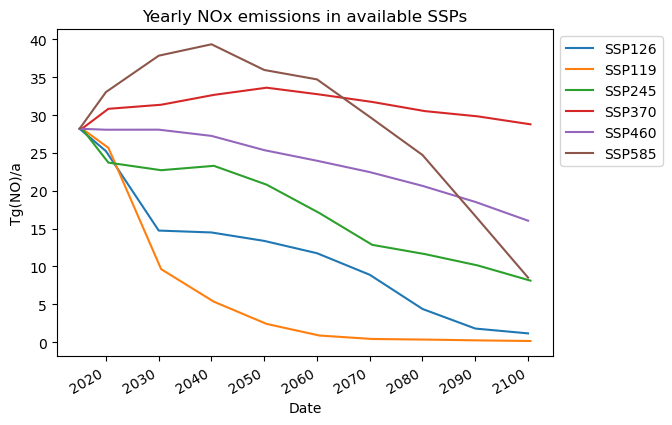

In [8]:
ax = ssp126_road.plot()
sspx_road.plot(ax=ax)
ssp460_road.plot(ax=ax)
ssp585_road.plot(ax=ax)

ax.set_title('Yearly NOx emissions in available SSPs')
ax.set_ylabel('Tg(NO)/a')
ax.legend(bbox_to_anchor=(1.0, 1.0))

### Historical

In [9]:
hist_emissions_file = '/work/bd1063/b309253/emissions/hist_road_nox.csv'
hist_emissions = make_emission_plottable(hist_emissions_file, 'CMIP6v6')

Text(0, 0.5, 'Tg(NO)/a')

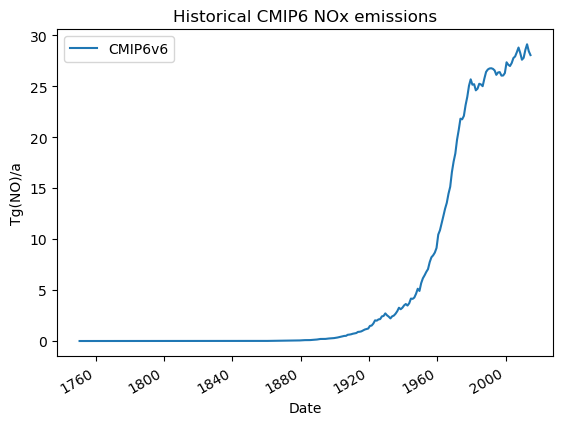

In [10]:
ax = hist_emissions.plot()

ax.set_title('Historical CMIP6 NOx emissions')
ax.set_ylabel('Tg(NO)/a')

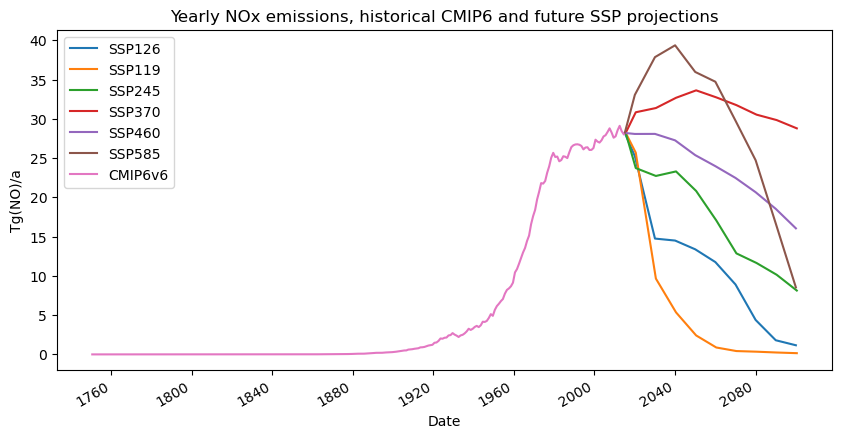

In [11]:
ax = ssp126_road.plot(figsize=(10, 5))
sspx_road.plot(ax=ax)
ssp460_road.plot(ax=ax)
ssp585_road.plot(ax=ax)

hist_emissions.plot(ax=ax)

ax.set_title('Yearly NOx emissions, historical CMIP6 and future SSP projections')
ax.set_ylabel('Tg(NO)/a')

plt.savefig('./plots/NOx_cmip6_ssps.pdf')

Text(0, 0.5, 'Tg(NO)/a')

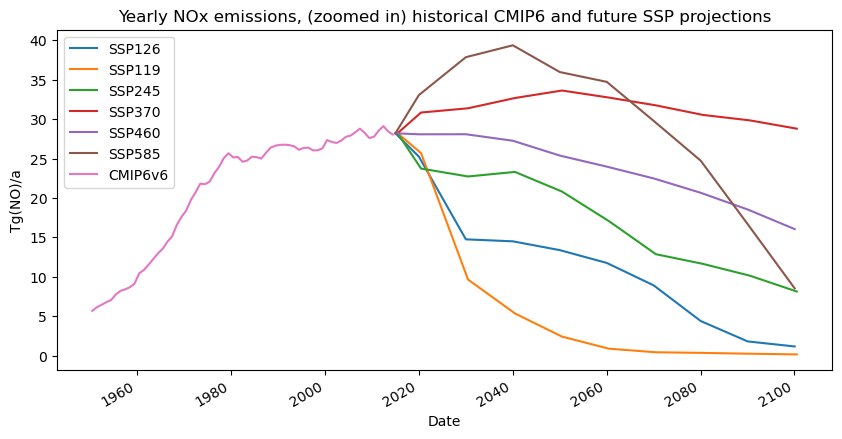

In [12]:
ax = ssp126_road.plot(figsize=(10, 5))
sspx_road.plot(ax=ax)
ssp460_road.plot(ax=ax)
ssp585_road.plot(ax=ax)
hist_emissions[200:].plot(ax=ax)

ax.set_title('Yearly NOx emissions, (zoomed in) historical CMIP6 and future SSP projections')
ax.set_ylabel('Tg(NO)/a')

# Adding all catalogues

### CAMS v5.3

To get land transport emissions in CAMS we sum the sectors **ROAD TRANSPORTATION** and **OFF ROAD TRANSPORTATION**

In [13]:
cams_nox_file = '/work/bd1063/b309253/emissions/cams-glob-ant-anthro-nox.csv'

In [14]:
cams = pd.read_csv(cams_nox_file, sep = ',')
cams.columns =  ['Date', 'CAMS Off Road transportation', 'CAMS Road transportation']
cams = cams.set_index(pd.to_datetime(cams['Date'])).drop(columns = ['Date'])

In [15]:
cams['CAMS Land Transport'] = cams['CAMS Off Road transportation'] + cams['CAMS Road transportation']
cams[:3]

CAMS Off Road transportation  CAMS Road transportation   
Date                                                                 
2000-01-01                      1.279055                 20.254938  \
2001-01-01                      1.274246                 19.907722   
2002-01-01                      1.276509                 19.806725   

            CAMS Land Transport  
Date                             
2000-01-01            21.533993  
2001-01-01            21.181968  
2002-01-01            21.083234

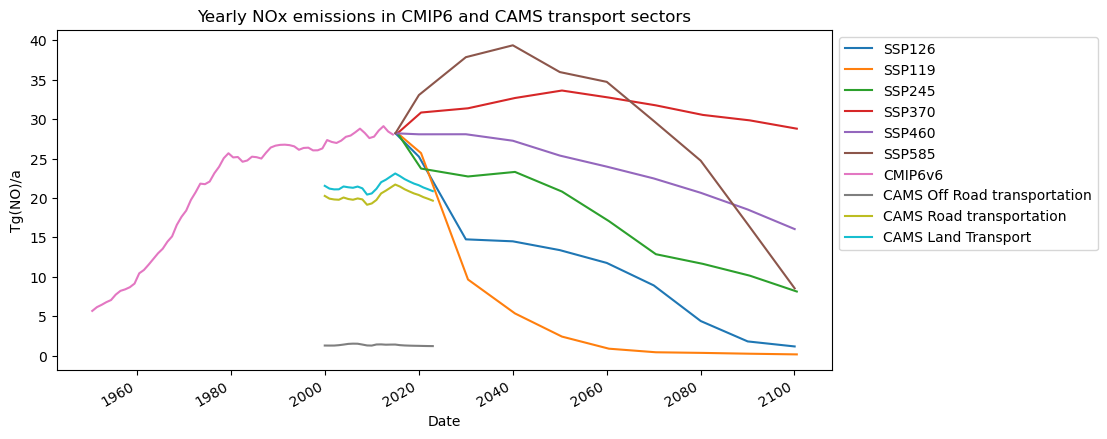

In [33]:
ax = ssp126_road.plot(figsize=(10, 5))
sspx_road.plot(ax=ax)
ssp460_road.plot(ax=ax)
ssp585_road.plot(ax=ax)
hist_emissions[200:].plot(ax=ax)
cams.plot(ax=ax)

ax.set_title('Yearly NOx emissions in CMIP6 and CAMS transport sectors')
ax.set_ylabel('Tg(NO)/a')
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig('./plots/NOx_cams_ssps.pdf')

### CEDS

In [17]:
ceds_file = '/work/bd1063/b309253/emissions/ceds-anthro-nox-yearly.csv'
ceds = make_emission_plottable(ceds_file, 'CEDS Transportation')

In [18]:
# Annual Total Anthropogenic Emissions of NO2 prepared for input4CMIP from CEDS_GBD-MAPS
ceds_input4cmip_path = '/work/bd1063/b309253/emissions/ceds_input4cmip_nox.csv'
ceds_input4cmip = make_emission_plottable(ceds_input4cmip_path, 'CEDS input4cmip Transportation')

In [19]:
# Mystery experiment
ceds_v1_path = '/work/bd1063/b309253/emissions/ceds_v1_nox.csv'
ceds_v1 = make_emission_plottable(ceds_v1_path, 'CEDS v1 Transportation')

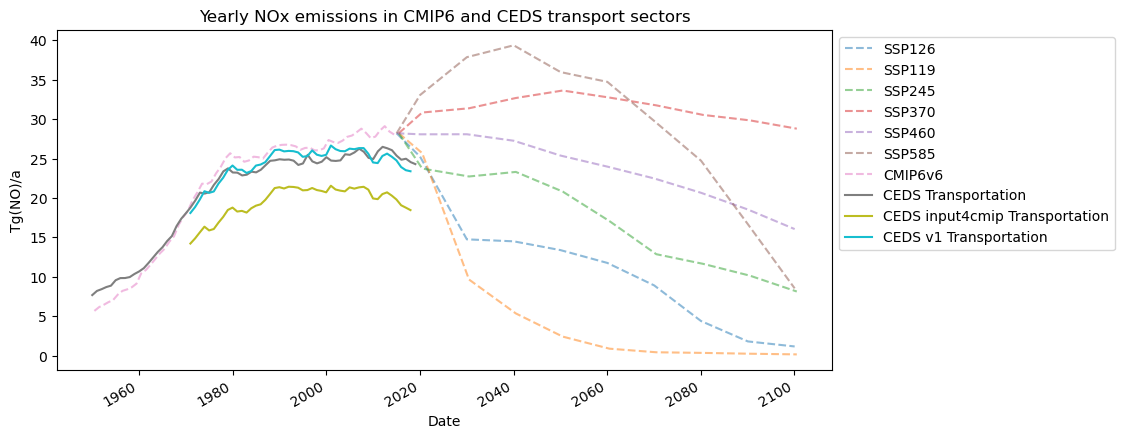

In [34]:
ax = ssp126_road.plot(figsize=(10, 5), linestyle='dashed', alpha = 0.5)
sspx_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
ssp460_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
ssp585_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
hist_emissions[200:].plot(ax=ax, linestyle='dashed', alpha = 0.5)
ceds.plot(ax=ax)
ceds_input4cmip.plot(ax=ax)
ceds_v1.plot(ax=ax)

ax.set_title('Yearly NOx emissions in CMIP6 and CEDS transport sectors')
ax.set_ylabel('Tg(NO)/a')
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig('./plots/NOx_ceds_ssps.pdf')

### ECLISPE

In [21]:
eclipse6_cle_file = '/work/bd1063/b309253/emissions/eclipse-v6-anthro-nox-cl.csv'
eclipse5_cle_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-cle-nox.csv'
eclipse5_cle2degrees_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-cle-2degrees-nox.csv'
eclipse5_mfr_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-mfr-nox.csv'
eclipse5_slcp_file = '/work/bd1063/b309253/emissions/eclipse-gains-v5a-anthro-slcp-nox.csv'

In [22]:
eclipse6_cle = make_emission_plottable(eclipse6_cle_file, 'ECLIPSE V6  CLE Transportation')
eclipse5_cle = make_emission_plottable(eclipse5_cle_file, 'ECLIPSE V5 CLE Transportation')
eclipse5_cle2degrees = make_emission_plottable(eclipse5_cle2degrees_file, 'ECLIPSE CLE 2^{o} Transportation')
eclipse5_mfr = make_emission_plottable(eclipse5_mfr_file, 'ECLIPSE V5 MFR Transportation')
eclipse5_slcp = make_emission_plottable(eclipse5_slcp_file, 'ECLIPSE V5 SLCP Transportation')

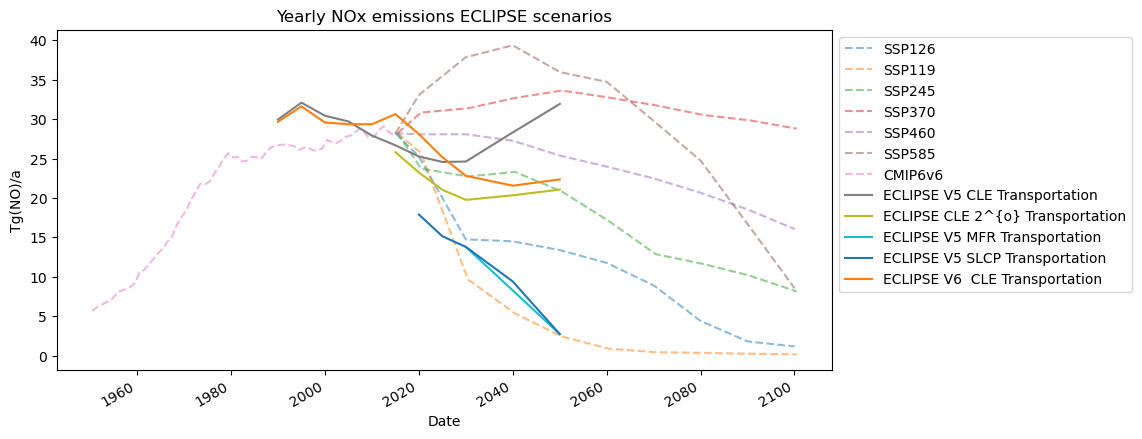

In [35]:
ax = ssp126_road.plot(figsize=(10, 5), linestyle='dashed', alpha = 0.5)
sspx_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
ssp460_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
ssp585_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
hist_emissions[200:].plot(ax=ax,  linestyle='dashed', alpha = 0.5)
eclipse5_cle.plot(ax=ax)
eclipse5_cle2degrees.plot(ax=ax)
eclipse5_mfr.plot(ax=ax)
eclipse5_slcp.plot(ax=ax)
eclipse6_cle.plot(ax=ax)

ax.set_title('Yearly NOx emissions ECLIPSE scenarios')
ax.set_ylabel('Tg(NO)/a')
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig('./plots/NOx_eclipse_ssps.pdf')

### EDGAR

To get land transport emissions in CAMS we sum the sectors **ROAD TRANSPORTATION** and **OFF ROAD TRANSPORTATION**

**Transport** contains emissions from the combustion of fuel for all transport activity, regardless of the sector, except for international marine bunkers and international aviation bunkers, which are not included in transport emissions at a national or regional level (except for World transport emissions). This includes domestic aviation, domestic navigation, road, rail and pipeline transport, and corresponds to IPCC Source/ Sink Category 1 A 3. The IEA data are not collected in a way that allows the autoproducer consumption to be split by specific end-use and therefore, this publication shows autoproducers as a separate item.
The procedures given for calculating emissions ensure that emissions from the use of fuels for international marine and air transport are excluded from national emissions totals.


**Road** contains the emissions arising from fuel use in road vehicles, including the use of agricultural vehicles on highways. This corresponds to the IPCC Source/Sink Category 1 A 3 b

In [24]:
edgar6_file = '/work/bd1063/b309253/emissions/edgarv6-anthro-nox-yearl.csv'
edgar6 = pd.read_csv(edgar6_file, sep = ',')
edgar6[:3]

Date   Non-road ground transportation   
0  1970-01-01 00:00:00                         3.372355  \
1  1971-01-01 00:00:00                         3.266692   
2  1972-01-01 00:00:00                         3.288476   

    Road transportation no resuspension  
0                             13.255782  
1                             13.838572  
2                             14.865932

In [25]:
edgar6.columns =  ['Date', 'EDGAR V6 Non-road ground transportation', 'EDGAR V6 Road transportation no resuspension']
edgar6 = edgar6.set_index(pd.to_datetime(edgar6['Date'])).drop(columns = ['Date'])

In [26]:
edgar6['EDGAR V6 Land Transport'] = edgar6['EDGAR V6 Non-road ground transportation'] + edgar6['EDGAR V6 Road transportation no resuspension']
edgar6[:3]

EDGAR V6 Non-road ground transportation   
Date                                                  
1970-01-01                                 3.372355  \
1971-01-01                                 3.266692   
1972-01-01                                 3.288476   

            EDGAR V6 Road transportation no resuspension   
Date                                                       
1970-01-01                                     13.255782  \
1971-01-01                                     13.838572   
1972-01-01                                     14.865932   

            EDGAR V6 Land Transport  
Date                                 
1970-01-01                16.628137  
1971-01-01                17.105264  
1972-01-01                18.154408

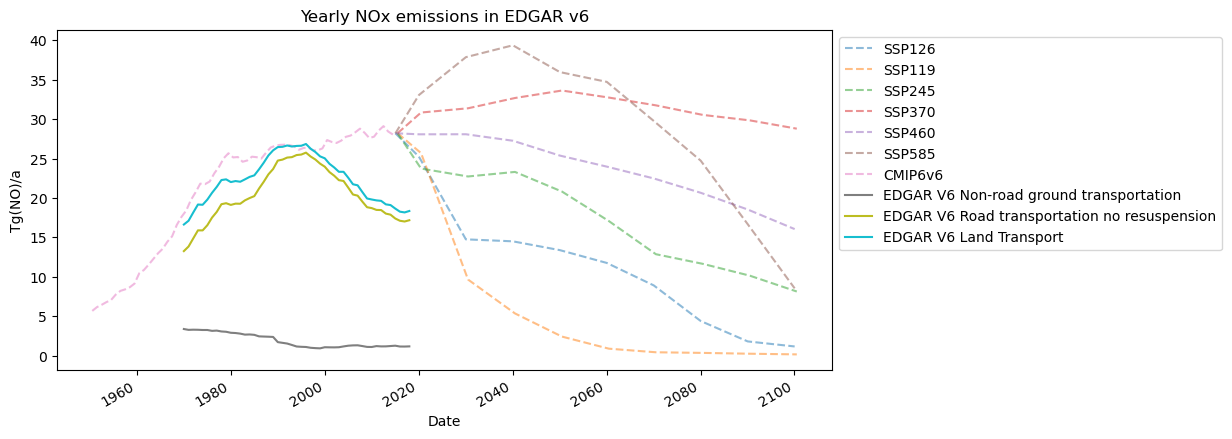

In [36]:
ax = ssp126_road.plot(figsize=(10, 5), linestyle='dashed', alpha = 0.5)
sspx_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
ssp460_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
ssp585_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
hist_emissions[200:].plot(ax=ax,  linestyle='dashed', alpha = 0.5)
edgar6.plot(ax=ax)

ax.set_title('Yearly NOx emissions in EDGAR v6')
ax.set_ylabel('Tg(NO)/a')
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig('./plots/NOx_edgar6_ssps.pdf')

In [28]:
edgar4_file = '/work/bd1063/b309253/emissions/edgarv432-anthro-nox-yea.csv'
edgar4 = pd.read_csv(edgar4_file, sep = ',')
edgar4.columns =  ['Date', 'EDGAR V4 Non-road ground transportation', 'EDGAR V4 Road transportation no resuspension']
edgar4 = edgar4.set_index(pd.to_datetime(edgar4['Date'])).drop(columns = ['Date'])
edgar4['EDGAR V4 Land Transport'] = edgar4['EDGAR V4 Non-road ground transportation'] + edgar4['EDGAR V4 Road transportation no resuspension']

In [29]:
edgar5_file = '/work/bd1063/b309253/emissions/edgarv5-anthro-nox-yearl.csv'
edgar5 = pd.read_csv(edgar5_file, sep = ',')
edgar5.columns =  ['Date', 'EDGAR V5 Non-road ground transportation', 'EDGAR V5 Road transportation no resuspension']
edgar5 = edgar5.set_index(pd.to_datetime(edgar5['Date'])).drop(columns = ['Date'])
edgar5['EDGAR V5 Land Transport'] = edgar5['EDGAR V5 Non-road ground transportation'] + edgar5['EDGAR V5 Road transportation no resuspension']

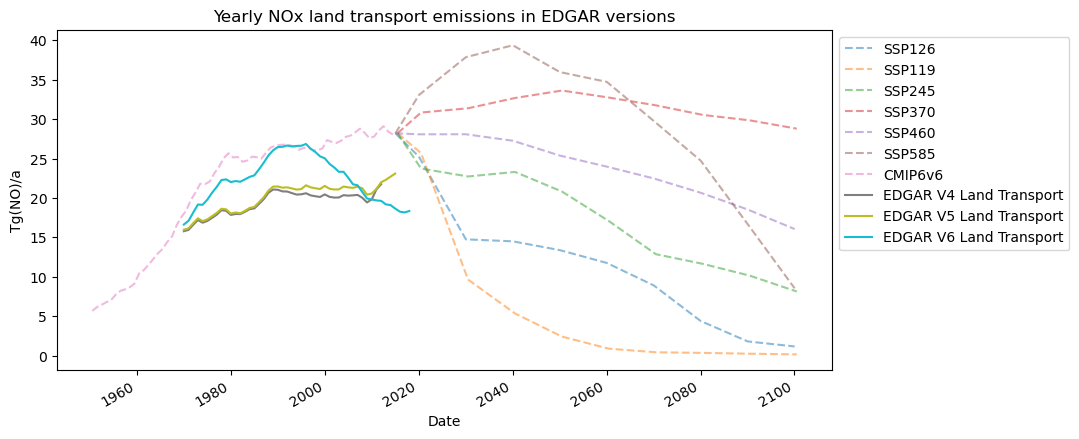

In [37]:
ax = ssp126_road.plot(figsize=(10, 5), linestyle='dashed', alpha = 0.5)
sspx_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
ssp460_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
ssp585_road.plot(ax=ax, linestyle='dashed', alpha = 0.5)
hist_emissions[200:].plot(ax=ax,  linestyle='dashed', alpha = 0.5)
edgar4['EDGAR V4 Land Transport'].plot(ax=ax)
edgar5['EDGAR V5 Land Transport'].plot(ax=ax)
edgar6['EDGAR V6 Land Transport'].plot(ax=ax)

ax.set_title('Yearly NOx land transport emissions in EDGAR versions')
ax.set_ylabel('Tg(NO)/a')
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig('./plots/NOx_edgars_ssps.pdf')

# All together

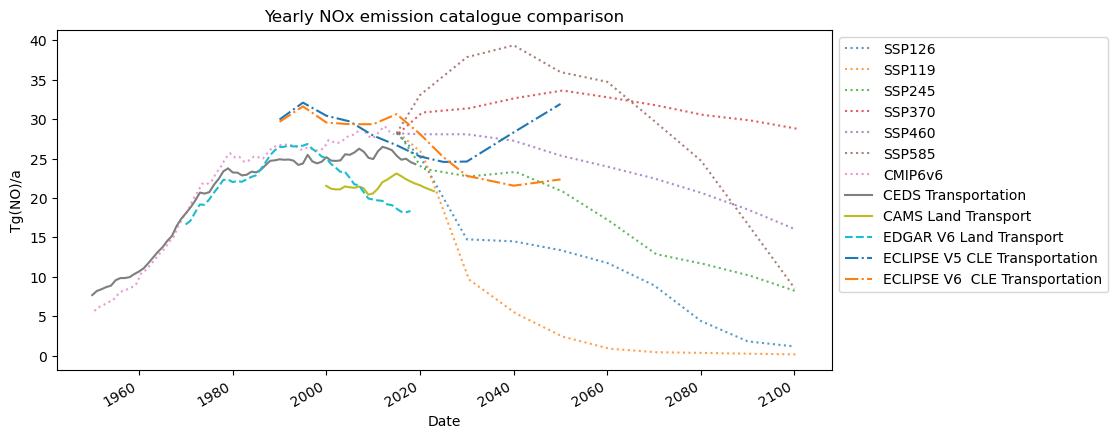

In [38]:
ax = ssp126_road.plot(figsize=(10, 5), linestyle='dotted', alpha = 0.75)
sspx_road.plot(ax=ax, linestyle='dotted', alpha = 0.75)
ssp460_road.plot(ax=ax, linestyle='dotted', alpha = 0.75)
ssp585_road.plot(ax=ax, linestyle='dotted', alpha = 0.75)
hist_emissions[200:].plot(ax=ax, linestyle='dotted', alpha = 0.75)
ceds.plot(ax=ax)
#ceds_input4cmip.plot(ax=ax)
#ceds_v1.plot(ax=ax)
cams['CAMS Land Transport'].plot(ax=ax)
#edgar4['EDGAR V4 Land Transport'].plot(ax=ax, linestyle='dashed')
#edgar5['EDGAR V5 Land Transport'].plot(ax=ax, linestyle='dashed')
edgar6['EDGAR V6 Land Transport'].plot(ax=ax, linestyle='dashed')
eclipse5_cle.plot(ax=ax, linestyle='dashdot')
#eclipse5_cle2degrees.plot(ax=ax, linestyle='dashdot')
#eclipse5_mfr.plot(ax=ax, linestyle='dashdot')
#eclipse5_slcp.plot(ax=ax, linestyle='dashdot')
eclipse6_cle.plot(ax=ax, linestyle='dashdot')

ax.set_title('Yearly NOx emission catalogue comparison')
ax.set_ylabel('Tg(NO)/a')
ax.legend(bbox_to_anchor=(1.0, 1.0))

plt.savefig('./plots/NOx_all.pdf')

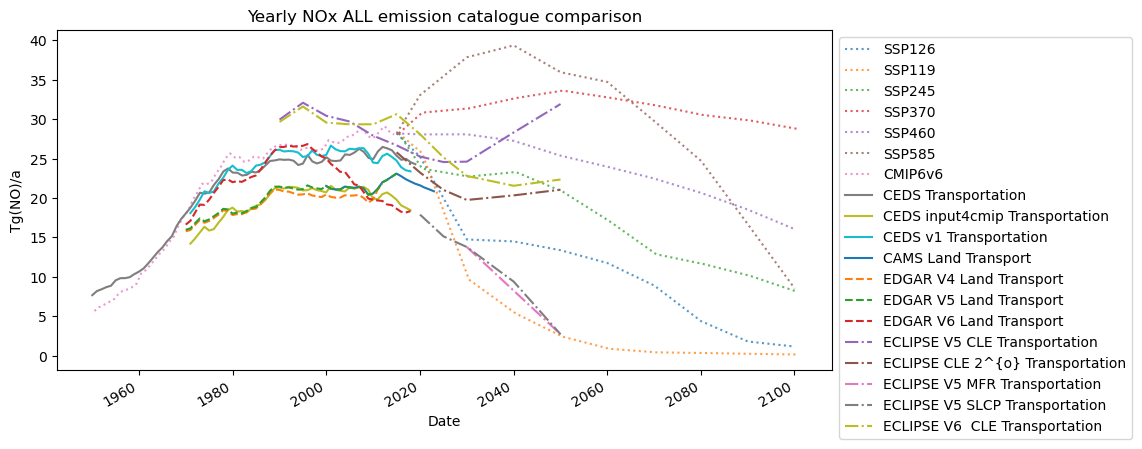

In [32]:
ax = ssp126_road.plot(figsize=(10, 5), linestyle='dotted', alpha = 0.75)
sspx_road.plot(ax=ax, linestyle='dotted', alpha = 0.75)
ssp460_road.plot(ax=ax, linestyle='dotted', alpha = 0.75)
ssp585_road.plot(ax=ax, linestyle='dotted', alpha = 0.75)
hist_emissions[200:].plot(ax=ax, linestyle='dotted', alpha = 0.75)
ceds.plot(ax=ax)
ceds_input4cmip.plot(ax=ax)
ceds_v1.plot(ax=ax)
cams['CAMS Land Transport'].plot(ax=ax)
edgar4['EDGAR V4 Land Transport'].plot(ax=ax, linestyle='dashed')
edgar5['EDGAR V5 Land Transport'].plot(ax=ax, linestyle='dashed')
edgar6['EDGAR V6 Land Transport'].plot(ax=ax, linestyle='dashed')
eclipse5_cle.plot(ax=ax, linestyle='dashdot')
eclipse5_cle2degrees.plot(ax=ax, linestyle='dashdot')
eclipse5_mfr.plot(ax=ax, linestyle='dashdot')
eclipse5_slcp.plot(ax=ax, linestyle='dashdot')
eclipse6_cle.plot(ax=ax, linestyle='dashdot')

ax.set_title('Yearly NOx ALL emission catalogue comparison')
ax.set_ylabel('Tg(NO)/a')
ax.legend(bbox_to_anchor=(1.0, 1.0))

### Sectors definitions

**SSP & CMIP6 transport**: 

Transportation sector for CMIP6 is the sum of **Road transportation** (proxy data source from EDGAR v4.3.2 ROAD)
and **Non-road transportation** (EDGAR v4.2 NRTR)

**CEDS Transportation**

Since it's the set of emissions prepared for CMIP6, the definition of the sectors are the same

**CAMS Land Transport**

To get land transport emissions in CAMS we sum the sectors **ROAD TRANSPORTATION** and **OFF ROAD TRANSPORTATION**

**EDGAR Transportation**

To get land transport in EDGAR, we sum the sub-sectors: **Non-road ground transportation** and **Road transportation no resuspension**

**Transport** contains emissions from the combustion of fuel for all transport activity, regardless of the sector, except for international marine bunkers and international aviation bunkers, which are not included in transport emissions at a national or regional level (except for World transport emissions). This includes domestic aviation, domestic navigation, road, rail and pipeline transport, and corresponds to IPCC Source/ Sink Category 1 A 3. The IEA data are not collected in a way that allows the autoproducer consumption to be split by specific end-use and therefore, this publication shows autoproducers as a separate item.
The procedures given for calculating emissions ensure that emissions from the use of fuels for international marine and air transport are excluded from national emissions totals.


**Road** contains the emissions arising from fuel use in road vehicles, including the use of agricultural vehicles on highways. This corresponds to the IPCC Source/Sink Category 1 A 3 b

**ECLIPSE Transportation**

**CLE** (Current legislation for air pollutants)

**MFR** (Maximum technically feasible reductions)

**CLE-2°** (Climate scenario (2 degrees, CLE))

**SLCP** (Short lived climate pollutants mitigation)

Definition of **Transport** sector is consistent with CMIP6, EDGAR